Resampling Assignment

1.Implement all the initial steps, which include installing smote-variants and loading the data using pandas. churn.csv: https://github.com/fenago/datasets/blob/main/WA_Fn-UseC_-Telco-Customer-Churn.csv

2.Normalize the numerical raw data using the MinMaxScaler() function.

3.Create dummy data for the categorical variables using the pd.get_dummies() function.

4.Separate the numerical data from the original data frame.

5.Concatenate numerical data and dummy categorical data using the pd.concat() function.

6.Split the earlier dataset into train and test sets using the train_test_split() function.

7.Since the dataset is imbalanced, you need to perform the various techniques mentioned in the following steps.

8.For the undersampling method, find the index of the minority class using the .index() function and separate the minority class. After that, sample the majority class and make the majority dataset equal to the minority class using the .sample() function. Concatenate both the minority and under-sampled majority class to form a new dataset. Shuffle the dataset and separate the X and Y variables.

9.Fit a logistic regression model on the under-sampled dataset and name it churnModel1.

10.For the SMOTE method, create the oversampler using the sv.SMOTE() function and create the new X and Y training sets.

11.Fit a logistic regression model using SMOTE and name it churnModel2.

12.Generate the two separate predictions for each model.

13.Generate separate accuracy metrics, classification reports, and confusion matrices for each of the predictions.

14.Analyze the results and select the best method.

1.Implement all the initial steps, which include installing smote-variants and loading the data using pandas. churn.csv: https://github.com/fenago/datasets/blob/main/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [1]:
import pandas as pd

df = pd.read_csv("churn.csv")



In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


2.Normalize the numerical raw data using the MinMaxScaler() function.


In [3]:
from sklearn.preprocessing import MinMaxScaler

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

df


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [4]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [5]:
scaler = MinMaxScaler()

df["tenure"] = scaler.fit_transform(df["tenure"].values.reshape(-1,1))
df["monthlycharges"] = scaler.fit_transform(df["monthlycharges"].values.reshape(-1,1))
df["totalcharges"] = scaler.fit_transform(df["totalcharges"].values.reshape(-1,1))


In [6]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,0.013889,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,0.115423,0.003437,0
1,5575-gnvde,male,0,no,no,0.472222,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,0.385075,0.217564,0
2,3668-qpybk,male,0,no,no,0.027778,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,0.354229,0.012453,1
3,7795-cfocw,male,0,no,no,0.625000,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),0.239303,0.211951,0
4,9237-hqitu,female,0,no,no,0.027778,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,0.521891,0.017462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,0.333333,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,0.662189,0.229194,0
7039,2234-xaduh,female,0,yes,yes,1.000000,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),0.845274,0.847792,0
7040,4801-jzazl,female,0,yes,yes,0.152778,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,0.112935,0.039892,0
7041,8361-ltmkd,male,1,yes,no,0.055556,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,0.558706,0.035303,1


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

3.Create dummy data for the categorical variables using the pd.get_dummies() function.


In [8]:
df = df.drop(columns=["customerid"])

df = pd.get_dummies(df)

In [9]:
df

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,0.013889,0.115423,0.003437,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.385075,0.217564,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.354229,0.012453,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.239303,0.211951,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.521891,0.017462,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.845274,0.847792,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.112935,0.039892,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.558706,0.035303,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


4.Separate the numerical data from the original data frame.


In [10]:
df_num = df.select_dtypes(include="number")

In [11]:
df_num

# Ignoring next step, was already concatted together

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,0.013889,0.115423,0.003437,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.385075,0.217564,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.354229,0.012453,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.239303,0.211951,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.521891,0.017462,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.845274,0.847792,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.112935,0.039892,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.558706,0.035303,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


6.Split the earlier dataset into train and test sets using the train_test_split() function.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_train, df_test = train_test_split(df, test_size=0.3, random_state=123)

In [13]:
# y_train = df_train.pop('churn')
# y_test = df_test.pop('churn')

In [14]:
# y_train.mean()

7.Since the dataset is imbalanced, you need to perform the various techniques mentioned in the following steps.

8.For the undersampling method, find the index of the minority class using the .index() function and separate the minority class. After that, sample the majority class and make the majority dataset equal to the minority class using the .sample() function. Concatenate both the minority and under-sampled majority class to form a new dataset. Shuffle the dataset and separate the X and Y variables.


In [15]:
ind_minority = df_train[df_train["churn"] == 1].index
print(len(ind_minority))

1279


In [16]:
df_train_minority = df_train.loc[ind_minority]
# y_train_minority = y_train.loc[ind_minority]

In [17]:
df_train_minority.shape

(1279, 46)

In [18]:
ind_majority = df_train[df_train["churn"] == 0].index
print(len(ind_majority))

3651


In [19]:
df_train_majority = df_train.loc[ind_majority].sample(len(df_train_minority))
# y_train_minority = y_train.loc[ind_minority]

In [20]:
len(df_train_majority)

1279

In [21]:
df_concat = pd.concat([df_train_minority, df_train_majority], axis=0)

In [22]:
df_concat

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
2668,0,0.013889,0.014925,0.002274,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
463,0,0.097222,0.811443,0.077520,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2283,0,0.013889,0.530348,0.008239,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3028,0,0.069444,0.248756,0.025216,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3830,0,0.055556,0.815423,0.048383,1,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,1.000000,0.024378,0.171806,0,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
3025,0,0.930556,0.080100,0.194466,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
157,0,0.305556,0.018905,0.048349,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2933,0,0.944444,0.057214,0.191634,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0


In [23]:
from sklearn.utils import shuffle
df_train_downsampled = shuffle(df_concat)
df_train_downsampled.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
6510,0,0.638889,0.809950,0.533138,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
665,0,0.041667,0.562189,0.027416,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
5874,0,0.138889,0.819403,0.122075,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
1832,1,0.791667,0.264677,0.296259,1,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
6788,0,0.347222,0.025373,0.052989,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [24]:
y_train_downsampled = df_train_downsampled.pop('churn')
y_test = df_test.pop('churn')

X_train_downsampled = df_train_downsampled
X_test = df_test

9.Fit a logistic regression model on the under-sampled dataset and name it churnModel1.

In [25]:
churnModel1 = LogisticRegression()
churnModel1.fit(X_train_downsampled, y_train_downsampled)
# pred = bankModel.predict(X_test)
# print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))


LogisticRegression()

10.For the SMOTE method, create the oversampler using the sv.SMOTE() function and create the new X and Y training sets.

In [26]:
import smote_variants as sv
import numpy as np

# Instantiating the SMOTE class
oversampler= sv.SMOTE()

y_train = df_train.pop("churn")
X_train = df_train

X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2022-09-12 16:43:05.991493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 16:43:06.137890: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 16:43:06.654834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-12 16:43:06.654959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

11.Fit a logistic regression model using SMOTE and name it churnModel2.

In [27]:
churnModel2 = LogisticRegression()
churnModel2.fit(X_train_os, y_train_os)


LogisticRegression()

12.Generate the two separate predictions for each model.

In [28]:
y_pred_downsampled = churnModel1.predict(X_test)
y_pred_os = churnModel2.predict(X_test)

13.Generate separate accuracy metrics, classification reports, and confusion matrices for each of the predictions.


In [29]:
from sklearn.metrics import classification_report

print("Downsampled report")
print(classification_report(y_test, y_pred_downsampled))

print("Oversampled report report")
print(classification_report(y_test, y_pred_os))

Downsampled report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1523
           1       0.54      0.77      0.63       590

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.79      0.75      0.76      2113

Oversampled report report
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1523
           1       0.54      0.78      0.64       590

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



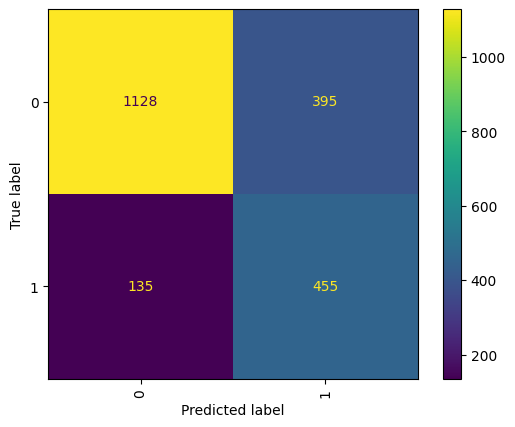

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(churnModel1, X_test, y_test, xticks_rotation="vertical")  

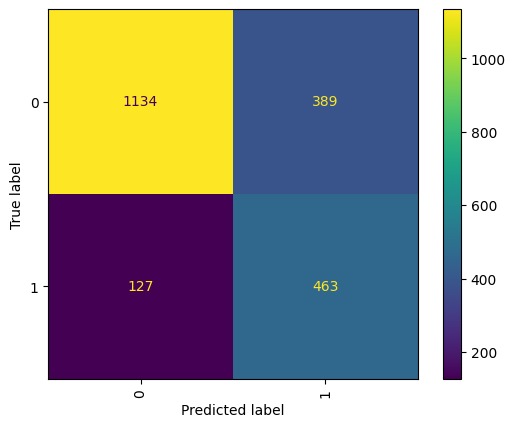

In [31]:
plot_confusion_matrix(churnModel2, X_test, y_test, xticks_rotation="vertical")  

14.Analyze the results and select the best method.

In [32]:
# Oversampling is slightly better as an option here, as the resultuing model has the same recall but higher precision for the target class